# <font color= 'Blue'>PlaidCloud Analyze
<font color='MidnightBlue'>Angela Grate  
![caption](https://pbs.twimg.com/profile_images/1149501773/plaidcloud-logo-only_400x400.jpeg)



# <font color= 'RoyalBlue'> Overview
<font color='MidnightBlue'>
- Introduction
- Purpose of Analyze
- Connectability 
- Analyze functions
- Demo
- Tips & Tricks
- Updates
- Help
- Employment

### <font color= 'RoyalBlue'>*Tartan Solutions* 
<font color='MidnightBlue'>business and consulting PCM implementation

###<font color= 'RoyalBlue'>*PlaidCloud*
<font color='MidnightBlue'>Analyze, Profit, Project, Tools, Document, PlaidXL

###<font color= 'RoyalBlue'>*Angela Grate*
<font color='MidnightBlue'>Business Analyst, junior at Capital University

## <font color= 'RoyalBlue'>The Need for Analyze

<font color='MidnightBlue'>
"We knew there was a better way of approaching data sourcing, 
transformation, and staging than using spreadsheets, desktop databases, 
or waiting on core systems teams to build transformation processes for us."
                                    *Paul Morel and Michael Rea, founders.* 


## <font color= 'RoyalBlue'>What Analyze Does
<font color='MidnightBlue'>
- Data analysis
- Flexibility solves large scale analytical problems
- Interacts with iPython Notebook 
- Designed to work with different data platforms
- Runs models, PoC 



###<font color='MidnightBlue'>PlaidCloud's Data Flexibility

<img src="PC Model list ss.png">

###<font color='MidnightBlue'>Accessing the iPython Notebook Server

<img src="PC iPS.png">

###<font color='MidnightBlue'>The PlaidCloud>>iPython Notebook Capability Yields Excellent Results for Visualization

####<font color= 'DodgerBlue'>matplotlib

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


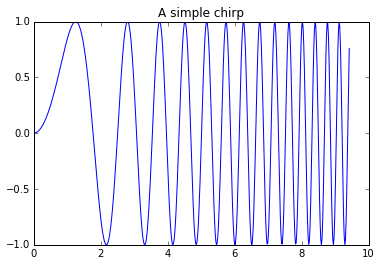

In [42]:
%pylab inline
x =linspace(0, 3*pi, 500)
plot(x, sin(x**2))
title('A simple chirp')

####<font color="DodgerBlue"> More exciting...Bokeh

In [43]:
import numpy as np
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

In [44]:
N = 4000

In [45]:
x = np.random.random(size=N) * 100
y = np.random.random(size=N) * 100
radii = np.random.random(size=N) * 1.5
colors = ["#%02x%02x%02x" % (r, g, 150) for r, g in zip(np.floor(50+2*x), np.floor(30+2*y))]


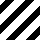
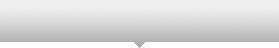
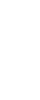
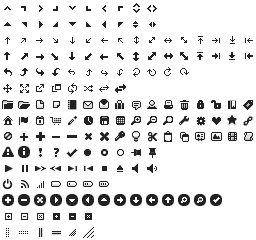
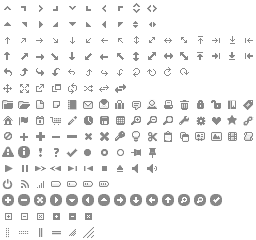
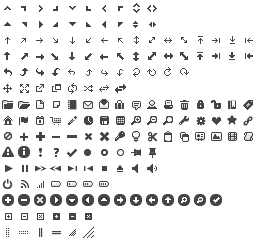
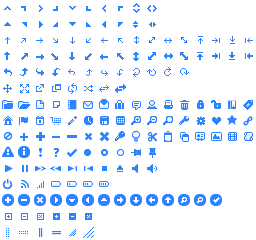
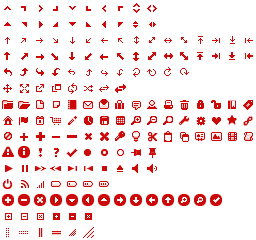
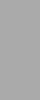
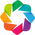
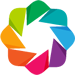
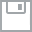
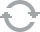
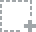
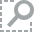
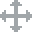
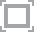
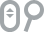

In [46]:
output_notebook()

In [47]:
p = figure()
p.triangle(x, y, radius=radii, fill_color=colors, fill_alpha=1.5, line_color=None)

In [48]:
show(p)

In [49]:
from __future__ import division
import numpy as np 
from bokeh.plotting import figure, show, output_file

In [50]:
N = 20
img = np.empty((N,N), dtype=np.uint32)
view = img.view(dtype=np.uint8).reshape((N, N, 4))
for i in range(N):
    for j in range(N):
        view [i, j, 0] = int(i/N*255)
        view[i, j, 1] = 158
        view[i, j, 2] = int(j/N*255)
        view[i, j, 3] = 255

In [51]:
output_file("image_rgba.html", title="image_rgba.py example")

In [52]:
p = figure(x_range=[0,10], y_range=[0,10])
p.image_rgba(image=[img], x=[0], y=[0], dw=[10], dh=[10])

In [53]:
show(p)

In [54]:
from collections import OrderedDict
from math import log, sqrt

import numpy as np
import pandas as pd
from six.moves import cStringIO as StringIO

from bokeh.plotting import figure, show, output_file

antibiotics = """
bacteria,                        penicillin, streptomycin, neomycin, gram
Mycobacterium tuberculosis,      800,        5,            2,        negative
Salmonella schottmuelleri,       10,         0.8,          0.09,     negative
Proteus vulgaris,                3,          0.1,          0.1,      negative
Klebsiella pneumoniae,           850,        1.2,          1,        negative
Brucella abortus,                1,          2,            0.02,     negative
Pseudomonas aeruginosa,          850,        2,            0.4,      negative
Escherichia coli,                100,        0.4,          0.1,      negative
Salmonella (Eberthella) typhosa, 1,          0.4,          0.008,    negative
Aerobacter aerogenes,            870,        1,            1.6,      negative
Brucella antracis,               0.001,      0.01,         0.007,    positive
Streptococcus fecalis,           1,          1,            0.1,      positive
Staphylococcus aureus,           0.03,       0.03,         0.001,    positive
Staphylococcus albus,            0.007,      0.1,          0.001,    positive
Streptococcus hemolyticus,       0.001,      14,           10,       positive
Streptococcus viridans,          0.005,      10,           40,       positive
Diplococcus pneumoniae,          0.005,      11,           10,       positive
"""

drug_color = OrderedDict([
    ("Penicillin",   "#0d3362"),
    ("Streptomycin", "#c64737"),
    ("Neomycin",     "black"  ),
])

gram_color = {
    "positive" : "#aeaeb8",
    "negative" : "#e69584",
}

df = pd.read_csv(StringIO(antibiotics),
                 skiprows=1,
                 skipinitialspace=True,
                 engine='python')

width = 800
height = 800
inner_radius = 90
outer_radius = 300 - 10

minr = sqrt(log(.001 * 1E4))
maxr = sqrt(log(1000 * 1E4))
a = (outer_radius - inner_radius) / (minr - maxr)
b = inner_radius - a * maxr

def rad(mic):
    return a * np.sqrt(np.log(mic * 1E4)) + b

big_angle = 2.0 * np.pi / (len(df) + 1)
small_angle = big_angle / 7

x = np.zeros(len(df))
y = np.zeros(len(df))

#output_file("burtin.html", title="burtin.py example")

p = figure(plot_width=width, plot_height=height, title="",
    x_axis_type=None, y_axis_type=None,
    x_range=[-420, 420], y_range=[-420, 420],
    min_border=0, outline_line_color="black",
    background_fill="#f0e1d2", border_fill="#f0e1d2")

p.line(x+1, y+1, alpha=0)

# annular wedges
angles = np.pi/2 - big_angle/2 - df.index.to_series()*big_angle
colors = [gram_color[gram] for gram in df.gram]
p.annular_wedge(
    x, y, inner_radius, outer_radius, -big_angle+angles, angles, color=colors,
)

# small wedges
p.annular_wedge(x, y, inner_radius, rad(df.penicillin),
    -big_angle+angles+5*small_angle, -big_angle+angles+6*small_angle,
    color=drug_color['Penicillin'])
p.annular_wedge(x, y, inner_radius, rad(df.streptomycin),
    -big_angle+angles+3*small_angle, -big_angle+angles+4*small_angle,
    color=drug_color['Streptomycin'])
p.annular_wedge(x, y, inner_radius, rad(df.neomycin),
    -big_angle+angles+1*small_angle, -big_angle+angles+2*small_angle,
    color=drug_color['Neomycin'])

# circular axes and lables
labels = np.power(10.0, np.arange(-3, 4))
radii = a * np.sqrt(np.log(labels * 1E4)) + b
p.circle(x, y, radius=radii, fill_color=None, line_color="white")
p.text(x[:-1], radii[:-1], [str(r) for r in labels[:-1]],
    text_font_size="8pt", text_align="center", text_baseline="middle")

# radial axes
p.annular_wedge(x, y, inner_radius-10, outer_radius+10,
    -big_angle+angles, -big_angle+angles, color="black")

# bacteria labels
xr = radii[0]*np.cos(np.array(-big_angle/2 + angles))
yr = radii[0]*np.sin(np.array(-big_angle/2 + angles))
label_angle=np.array(-big_angle/2+angles)
label_angle[label_angle < -np.pi/2] += np.pi # easier to read labels on the left side
p.text(xr, yr, df.bacteria, angle=label_angle,
    text_font_size="9pt", text_align="center", text_baseline="middle")

# OK, these hand drawn legends are pretty clunky, will be improved in future release
p.circle([-40, -40], [-370, -390], color=list(gram_color.values()), radius=5)
p.text([-30, -30], [-370, -390], text=["Gram-" + gr for gr in gram_color.keys()],
    text_font_size="7pt", text_align="left", text_baseline="middle")

p.rect([-40, -40, -40], [18, 0, -18], width=30, height=13,
    color=list(drug_color.values()))
p.text([-15, -15, -15], [18, 0, -18], text=list(drug_color.keys()),
    text_font_size="9pt", text_align="left", text_baseline="middle")

p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None

show(p)

[Bokeh Gallery](http://bokeh.pydata.org/en/latest/docs/gallery.html)

[Github Gallery](https://github.com/mbostock/d3/wiki/Gallery)

Get data from Quandl, data.gov, databases, google

[PlaidCloud Model](https://plaidcloud.com/client)

Show 8 varieties of data, different import methods

[Python 2](US Cities population.ipynb)
[Python 2](tom hanks.ipynb)
[Python 2](Action Movie Data.ipynb)
[Python 2](Total Crime Index.ipynb)
[Python 2](Cities Population and Crime.ipynb)
[Python 2](FBI Weapons.ipynb)
[Python 2](Refugee Locations.ipynb)
[Python 2](red lights.ipynb)
[Python 2](movie financials.ipynb)

###<font color= 'RoyalBlue'>Now Hiring! Employment Opportunities:
<font color= 'Blue'>
- angela.grate@tartansolutions.com
- info@tartansolutions.com
- https://tartansolutions.com/
- https://plaidcloud.com/ 
- Phone: +1 412-512-7900


#<font color= 'Blue'>Thank You!